In [1]:
#Import Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [2]:
# Load the dataset
file_path = "HousePricePrediction.xlsx"
df = pd.read_excel(file_path)

# Display first 5 rows
print(df.head())


   Id  MSSubClass MSZoning  LotArea LotConfig BldgType  OverallCond  \
0   0          60       RL     8450    Inside     1Fam            5   
1   1          20       RL     9600       FR2     1Fam            8   
2   2          60       RL    11250    Inside     1Fam            5   
3   3          70       RL     9550    Corner     1Fam            5   
4   4          60       RL    14260       FR2     1Fam            5   

   YearBuilt  YearRemodAdd Exterior1st  BsmtFinSF2  TotalBsmtSF  SalePrice  
0       2003          2003     VinylSd         0.0        856.0   208500.0  
1       1976          1976     MetalSd         0.0       1262.0   181500.0  
2       2001          2002     VinylSd         0.0        920.0   223500.0  
3       1915          1970     Wd Sdng         0.0        756.0   140000.0  
4       2000          2000     VinylSd         0.0       1145.0   250000.0  


In [3]:
#Select Features and Target Variable
# Feature variables
X = df[['LotArea', 'OverallCond']]

# Target variable
y = df['SalePrice']


In [4]:
# Remove rows with missing target values
df = df.dropna(subset=['SalePrice'])
X = df[['LotArea', 'OverallCond']]
y = df['SalePrice']


In [ ]:
#Split Data into Training and Testing Sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [6]:
#Create and Train the Linear Regression Model
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [7]:
#Make Predictions
y_pred = model.predict(X_test)


In [8]:
#Evaluate the Model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error (MSE):", mse)
print("R² Score:", r2)


Mean Squared Error (MSE): 7138546094.462612
R² Score: 0.0693295302390442


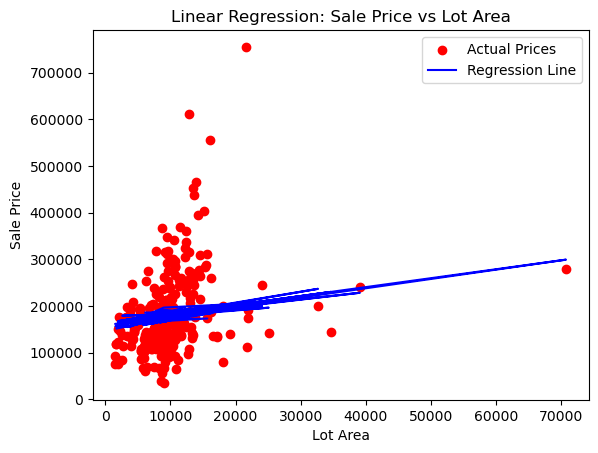

In [18]:
plt.figure()
plt.scatter(X_test['LotArea'], y_test, color='red', label='Actual Prices')
plt.plot(X_test['LotArea'], y_pred, color='blue', label='Regression Line')
plt.xlabel("Lot Area")
plt.ylabel("Sale Price")
plt.title("Linear Regression: Sale Price vs Lot Area")
plt.legend()
plt.show()


In [10]:
#Print Model Coefficients
print("Intercept:", model.intercept_)
print("Coefficients:", model.coef_)


Intercept: 189926.5837146935
Coefficients: [ 1.91249487e+00 -5.17997660e+03]
